In [2]:
import pandas as pd
import numpy as np
import math

In [3]:
data = pd.read_csv("KNNinput.csv", low_memory = False);
cols = list(data);
print(cols);

['Unnamed: 0', 'principal component 1', 'principal component 2', 'principal component 3', 'principal component 4', 'P. Habitable Class', 'principal component 5', 'principal component 6', 'principal component 7', 'principal component 8', 'principal component 9', 'principal component 10', 'principal component 11', 'principal component 12', 'principal component 13', 'principal component 14', 'principal component 15', 'principal component 16', 'principal component 17', 'principal component 18', 'principal component 19', 'principal component 20', 'principal component 21', 'principal component 22']


In [4]:
data = data.drop('P. Name', 1);

In [5]:
data = data.drop('P. Disc. Method',1);
data = data.drop('P. Confirmed', 1);
data = data.drop('P. Hab Moon', 1);
data = data.drop('P. Habitable', 1);
data = data.drop('S. HabCat', 1);
data = data.drop('S. Type', 1);
data = data.drop('S. Constellation', 1);
data.to_csv('knn.csv');

In [4]:
cols = list(data);
print(cols);

['Unnamed: 0', 'principal component 1', 'principal component 2', 'principal component 3', 'principal component 4', 'P. Habitable Class', 'principal component 5', 'principal component 6', 'principal component 7', 'principal component 8', 'principal component 9', 'principal component 10', 'principal component 11', 'principal component 12', 'principal component 13', 'principal component 14', 'principal component 15', 'principal component 16', 'principal component 17', 'principal component 18', 'principal component 19', 'principal component 20', 'principal component 21', 'principal component 22']


In [7]:
print(data['P. Zone Class'].value_counts())

Hot     3220
Cold     341
Warm     229
Name: P. Zone Class, dtype: int64


In [8]:
zoneclass = {'Hot':1, 'Cold':2, 'Warm':3};
data['P. Zone Class'] = [zoneclass[item] for item in data['P. Zone Class']];
print(data['P. Zone Class'].value_counts())

1    3220
2     341
3     229
Name: P. Zone Class, dtype: int64


In [9]:
print(data['P. Mass Class'].value_counts())

Jovian         1205
Superterran     990
Neptunian       808
Terran          710
Subterran        72
Mercurian         5
Name: P. Mass Class, dtype: int64


In [10]:
massclass = {'Jovian':1, 'Superterran':2, 'Neptunian':3, 'Terran':4, 'Subterran':5, 'Mercurian':6};
data['P. Mass Class'] = [massclass[item] for item in data['P. Mass Class']];
print(data['P. Mass Class'].value_counts())

1    1205
2     990
3     808
4     710
5      72
6       5
Name: P. Mass Class, dtype: int64


In [11]:
print(data['P. Composition Class'].value_counts())

gas            2041
rocky-iron     1663
rocky-water      45
water-gas        24
iron             17
Name: P. Composition Class, dtype: int64


In [12]:
compclass = {'gas':1, 'rocky-iron':2, 'rocky-water':3, 'water-gas':4, 'iron':5};
data['P. Composition Class'] = [compclass[item] for item in data['P. Composition Class']];
print(data['P. Composition Class'].value_counts())

1    2041
2    1663
3      45
4      24
5      17
Name: P. Composition Class, dtype: int64


In [13]:
print(data['P. Atmosphere Class'].value_counts())

metals-rich      2372
hydrogen-rich    1041
no-atmosphere     377
Name: P. Atmosphere Class, dtype: int64


In [14]:
atclass = {'metals-rich':1, 'hydrogen-rich':2, 'no-atmosphere':3};
data['P. Atmosphere Class'] = [atclass[item] for item in data['P. Atmosphere Class']];
print(data['P. Atmosphere Class'].value_counts())

1    2372
2    1041
3     377
Name: P. Atmosphere Class, dtype: int64


In [15]:
print(data['P. Habitable Class'].value_counts())

non-habitable        3735
mesoplanet             31
psychroplanet          18
thermoplanet            3
hypopsychroplanet       3
Name: P. Habitable Class, dtype: int64


In [16]:
habclass = {'non-habitable':0, 'mesoplanet':1, 'psychroplanet':1, 'hypopsychroplanet':1, 'thermoplanet':1};
data['P. Habitable Class'] = [habclass[item] for item in data['P. Habitable Class']];
print(data['P. Habitable Class'].value_counts())

0    3735
1      55
Name: P. Habitable Class, dtype: int64


In [17]:
data.to_csv('knn.csv');

In [18]:
print(cols)

['P. Zone Class', 'P. Mass Class', 'P. Composition Class', 'P. Atmosphere Class', 'P. Habitable Class', 'P. Mass (EU)', 'P. Radius (EU)', 'P. Density (EU)', 'P. Gravity (EU)', 'P. Esc Vel (EU)', 'P. SFlux Min (EU)', 'P. SFlux Mean (EU)', 'P. SFlux Max (EU)', 'P. Teq Min (K)', 'P. Teq Mean (K)', 'P. Teq Max (K)', 'P. Surf Press (EU)', 'P. Mag', 'P. Appar Size (deg)', 'P. Period (days)', 'P. Sem Major Axis (AU)', 'P. Eccentricity', 'P. Mean Distance (AU)', 'P. Omega (deg)', 'S. Mass (SU)', 'S. Radius (SU)', 'S. Teff (K)', 'S. Luminosity (SU)', 'S. [Fe/H]', 'S. Age (Gyrs)', 'S. Appar Mag', 'S. Distance (pc)', 'S. RA (hrs)', 'S. DEC (deg)', 'S. Mag from Planet', 'S. Size from Planet (deg)', 'S. No. Planets', 'S. No. Planets HZ', 'S. Hab Zone Min (AU)', 'S. Hab Zone Max (AU)', 'P. HZD', 'P. HZC', 'P. HZA', 'P. HZI', 'P. ESI']


In [19]:
cols.remove('P. Habitable Class');

In [20]:
print(cols);

['P. Zone Class', 'P. Mass Class', 'P. Composition Class', 'P. Atmosphere Class', 'P. Mass (EU)', 'P. Radius (EU)', 'P. Density (EU)', 'P. Gravity (EU)', 'P. Esc Vel (EU)', 'P. SFlux Min (EU)', 'P. SFlux Mean (EU)', 'P. SFlux Max (EU)', 'P. Teq Min (K)', 'P. Teq Mean (K)', 'P. Teq Max (K)', 'P. Surf Press (EU)', 'P. Mag', 'P. Appar Size (deg)', 'P. Period (days)', 'P. Sem Major Axis (AU)', 'P. Eccentricity', 'P. Mean Distance (AU)', 'P. Omega (deg)', 'S. Mass (SU)', 'S. Radius (SU)', 'S. Teff (K)', 'S. Luminosity (SU)', 'S. [Fe/H]', 'S. Age (Gyrs)', 'S. Appar Mag', 'S. Distance (pc)', 'S. RA (hrs)', 'S. DEC (deg)', 'S. Mag from Planet', 'S. Size from Planet (deg)', 'S. No. Planets', 'S. No. Planets HZ', 'S. Hab Zone Min (AU)', 'S. Hab Zone Max (AU)', 'P. HZD', 'P. HZC', 'P. HZA', 'P. HZI', 'P. ESI']


In [5]:
def euclid(rows, remval):
    value = 0;
    loopcounter = 0;
    fintuple = [];
    allrows = data.itertuples(index = False);
    allrows = list(allrows);
    for k in allrows:
        loopcounter = loopcounter + 1;
        value = 0;
        l = list(k);
       
        if(loopcounter == remval):
            loopcounter = loopcounter + 1;
            
        else:
            for j in range(len(rows)):
                value+=(rows[j]-l[j])**2;
            fintuple.append(math.sqrt(value));
        
            loopcounter = loopcounter + 1;
            #print(loopcounter);
    return fintuple 

In [6]:
def mode(a, b, c):
    if(a==b and b==c):
        return a
    if(a==b):
        return a
    if(b==c):
        return b
    if(c ==a):
        return c

In [52]:
outputval = []
eucdist = [];
i = 0;
accuracy_tuple = []
precision_tuple = []
recall_tuple = []
fscore_tuple = []
tn = 0.00001
tp = 0.00001
fn = 0.00001
fp = 0.00001
for row in data.itertuples(index=False):
 
    dist = euclid(list(row), i);
    m1 = dist.index(min(dist));
    dist[m1] = math.inf;
    m2 = dist.index(min(dist));
    dist[m2] = math.inf;
    m3 = dist.index(min(dist));
    dist[m3] = math.inf;
  
    out = mode(data['P. Habitable Class'][m1], data['P. Habitable Class'][m2], data['P. Habitable Class'][m3])
    outputval.append(out);
    eucdist.append(out == row[5]);
    if(int(out) == 1 and int(row[5]) == 1):
            
        tp = tp + 1
    if(int(out) == 1 and int(row[5]) == 0):
            
        fp = fp + 1
    if(int(out) == 0 and int(row[5]) == 0):
            
        tn = tn + 1
    if(int(out) == 0 and int(row[5]) == 1):
            
        fn = fn + 1
    #print(str(len(dist))+" "+str(len(data)));
    
    i = i + 1;
print(eucdist)

[True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, Tru

In [54]:
precision = tp/(tp + fp)
recall = tp/(tp+fn)
fscore = 2*(precision*recall)/(precision + recall)
print(precision)
print(recall)
print(fscore)
print(precision + recall)

0.7499996875003906
0.21818192066111972
0.33802826026576877
0.9681816081615103


In [55]:
count = 0;
for i in range(len(eucdist)):
    if(eucdist[i] == True):
        count = count + 1;
accuracy = count /len(eucdist);
print(accuracy);

0.987598944591029


In [16]:
import random

In [17]:
testrows = []
while(len(testrows)!=100):
    a = random.randint(1,len(data)+1)
    if(a not in testrows):
        testrows.append(a)
print(testrows)

[333, 841, 3484, 2564, 783, 3422, 1342, 3477, 1919, 926, 3277, 2644, 2038, 2823, 2391, 3460, 2614, 2846, 2285, 3762, 3041, 2797, 727, 1101, 3273, 61, 1830, 2710, 3387, 1488, 3699, 3174, 1224, 3702, 872, 1875, 955, 2905, 3663, 1470, 850, 3246, 1108, 2075, 367, 264, 1033, 2916, 2707, 3160, 1360, 2058, 275, 2225, 1674, 1554, 2002, 2960, 2822, 1166, 1604, 2928, 665, 3476, 2384, 2432, 1274, 312, 953, 2610, 694, 3173, 2692, 2481, 1970, 788, 2086, 866, 1265, 1822, 168, 1215, 2705, 1800, 177, 886, 3081, 1323, 3085, 3710, 1540, 1318, 2371, 724, 3433, 3590, 2035, 2112, 3668, 94]


In [18]:
testr = []
for i in testrows:
    testr.append(list(data.loc[i]))
print(testr)

[[333.0, 2.892375649, 5.945246407999999, 0.470479617, -2.67268706, 0.0, -2.352361845, -0.103855139, 0.26681384399999997, 0.12150143199999999, -0.620669471, -0.266785773, 1.111611546, -0.069248399, -1.2735166390000001, -0.057022409, 1.358907483, 0.118384966, 1.1642724709999999, -0.46225364, -0.852149519, 1.3489029030000002, 1.271738381, 0.204411752], [841.0, 3.723070958, 0.785642882, -1.707406785, 0.169468222, 0.0, 0.12840628099999998, -0.39709036600000003, -0.584452777, -0.531567418, 0.837655995, 1.319631917, -0.361978139, 0.097131674, 1.163541732, 0.14099156599999998, -0.223846895, 0.943415819, 0.1242233, -0.262266067, -1.243209427, 0.186065357, -0.075904046, -1.4349555369999998], [3484.0, 3.919575283, -0.11788389699999999, 3.3561249269999998, -2.643558192, 0.0, 2.058543526, -1.4792188019999999, -5.56311313, -4.225923538, 2.78184956, 8.974132545, -3.445880575, 3.174034352, -3.089599738, 4.634744059, -4.078347668, -7.043208503, -4.633384692, -3.28822912, 3.0831145110000002, 4.47946316,

In [19]:
outp = []
eucdist = []
i = 0
for row in testr:
 
    dist = euclid(row, i);
    m1 = dist.index(min(dist));
    dist[m1] = math.inf;
    m2 = dist.index(min(dist));
    dist[m2] = math.inf;
    m3 = dist.index(min(dist));
    dist[m3] = math.inf;
  
    out = mode(data['P. Habitable Class'][m1], data['P. Habitable Class'][m2], data['P. Habitable Class'][m3])
    outputval.append(out);
    eucdist.append(out == row[5]);
    #print(str(len(dist))+" "+str(len(data)));
    
    i = i + 1;
print(eucdist)

[True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True]


In [41]:
accuracy_tuple = []
precision_tuple = []
recall_tuple = []
fscore_tuple = []
for iter in range(50):
    tn = 0.00001
    tp = 0.00001
    fn = 0.00001
    fp = 0.00001
    testrows = []
    while(len(testrows)!=379):
        a = random.randint(0,len(data)-1)
        if(a not in testrows):
            testrows.append(a)
    testr = []
    for i in testrows:
        testr.append(list(data.loc[i]))
    outp = []
    eucdist = []
    i = 0
    for row in testr:

 
        dist = euclid(row, i);
        m1 = dist.index(min(dist));
        dist[m1] = math.inf;
        m2 = dist.index(min(dist));
        dist[m2] = math.inf;
        m3 = dist.index(min(dist));
        dist[m3] = math.inf;
  
        out = mode(data['P. Habitable Class'][m1], data['P. Habitable Class'][m2], data['P. Habitable Class'][m3])
        outputval.append(out);
        
        if(int(out) == 1 and int(row[5]) == 1):
            
            tp = tp + 1
        if(int(out) == 1 and int(row[5]) == 0):
            
            fp = fp + 1
        if(int(out) == 0 and int(row[5]) == 0):
            
            tn = tn + 1
        if(int(out) == 0 and int(row[5]) == 1):
            
            fn = fn + 1
            
        eucdist.append(out == row[5]);
        #print(str(len(dist))+" "+str(len(data)));
    
        i = i + 1;
    #print("true positive = " + str(tp));
    #print("true negative = " + str(tn));
    #print("false positive = " + str(fp));
    #print("false negative = " + str(fn));
    precision = tp/(tp + fp)
    recall = tp/(tp + fn)
    fscore = 2*(precision*recall)/(recall + precision)
    precision_tuple.append(precision)
    recall_tuple.append(recall)
    fscore_tuple.append(fscore)
    count = 0;
    for k in eucdist:
        if(k == True):
            count = count + 1
    accuracy_tuple.append(count/len(eucdist))
        

In [42]:
print(accuracy_tuple)
print(recall_tuple)
print(fscore_tuple)
print(precision_tuple)

[0.9815303430079155, 0.9920844327176781, 0.9894459102902374, 0.9815303430079155, 0.9947229551451188, 0.9894459102902374, 0.9815303430079155, 0.9894459102902374, 0.9947229551451188, 0.978891820580475, 0.9841688654353562, 0.9868073878627969, 0.9815303430079155, 0.9920844327176781, 0.9947229551451188, 0.9947229551451188, 0.9841688654353562, 0.9841688654353562, 0.9947229551451188, 0.9841688654353562, 0.9920844327176781, 0.9815303430079155, 0.9868073878627969, 0.9894459102902374, 0.9841688654353562, 0.9815303430079155, 0.9815303430079155, 0.9894459102902374, 1.0, 0.9894459102902374, 0.9868073878627969, 0.9947229551451188, 0.9894459102902374, 0.9841688654353562, 0.9868073878627969, 0.9894459102902374, 0.9973614775725593, 0.9973614775725593, 0.9920844327176781, 0.9894459102902374, 0.9841688654353562, 0.9868073878627969, 0.9841688654353562, 0.9894459102902374, 0.978891820580475, 0.9709762532981531, 0.9947229551451188, 0.9920844327176781, 0.9920844327176781, 0.9894459102902374]
[0.1428581632623

In [46]:
accuracy = np.mean(accuracy_tuple)*100
print(accuracy)

ps = np.mean(precision_tuple)*100
print(ps)

rc = np.mean(recall_tuple)*100
print(rc)

f1 = np.mean(fscore_tuple)*100
print(f1)

98.80211081794194
68.1331285806449
24.53186180332553
32.73664838079169


In [47]:
import matplotlib.pyplot as plt

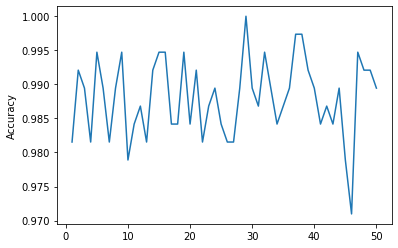

In [48]:
x_axis = range(1,51)
plt.plot(x_axis, accuracy_tuple)
plt.ylabel("Accuracy")
plt.show()

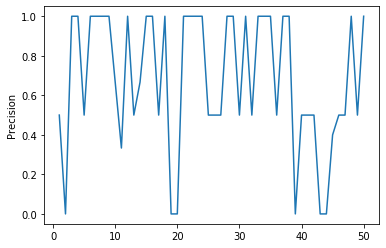

In [49]:
plt.plot(x_axis, precision_tuple)
plt.ylabel("Precision")
plt.show()

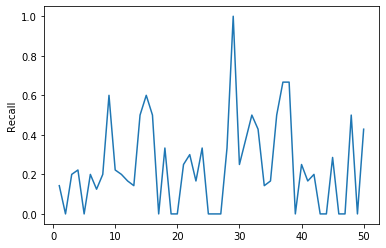

In [50]:
plt.plot(x_axis, recall_tuple)
plt.ylabel("Recall")
plt.show()

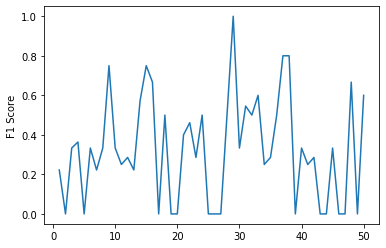

In [51]:
plt.plot(x_axis, fscore_tuple)
plt.ylabel("F1 Score")
plt.show()